In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
file_path = '/Users/shebinsam/Desktop/cogs/cogs-164/Fear of Failure–Survey (COGS 164) (Responses) - Form Responses 1.csv'

df = pd.read_csv(file_path)

df.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
0,3/6/2024 20:19:19,1,2,2,1,1,2,30.000000,4,4,...,3.0,3,4,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
1,2/29/2024 19:03:31,3,2,4,2,2,4,56.666667,4,3,...,3.0,4,5,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
2,3/2/2024 15:45:12,4,4,4,4,4,4,80.000000,3,3,...,3.0,3,3,3,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.
3,3/2/2024 21:44:03,5,5,5,5,3,5,93.333333,5,4,...,4.0,5,5,5,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
4,3/6/2024 13:28:41,4,4,4,5,4,3,80.000000,5,4,...,2.0,4,4,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
5,2/29/2024 11:00:41,4,5,3,1,4,3,66.666667,4,4,...,5.0,2,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
6,2/29/2024 18:48:28,5,3,3,5,4,4,80.000000,3,4,...,4.0,3,4,4,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
7,2/29/2024 23:47:48,5,5,5,5,5,5,100.000000,5,5,...,4.0,4,3,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.


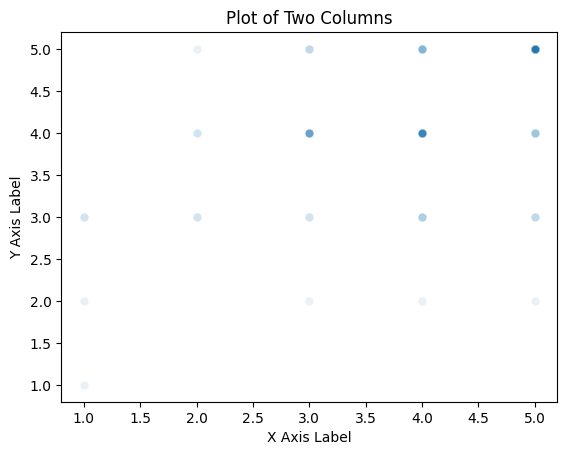

In [3]:
sns.scatterplot(data=df,x='Rate FF', y='Goals anxiety',alpha=0.1)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot of Two Columns')
plt.show()

In [4]:
fof = df[["Rate FF","Goals anxiety","FF-High Stakes","FF-Future plans","Self-Value","Outcome Control"]].sum()
fof_total = df["Rate FF"]+ df["Goals anxiety"]+df["FF-High Stakes"] + df["FF-Future plans"] + df["Self-Value"] + df["Outcome Control"]
fof_total = fof_total/30
fof_total = fof_total*100


mot_total = df["Rate AM"]+ df["Intrinsic Motivation"]+df["Seeking Learning Opportunity"] + df["Enthusiasm in Challenges"] + df["Self Comparison"] + df["Score Comparison"]
mot_total =mot_total/30
mot_total = mot_total*100

df_col_merged = pd.concat([fof_total, mot_total], axis=1)


In [5]:
print(df_col_merged)

            0          1
0   30.000000  70.000000
1   56.666667  76.666667
2   80.000000  60.000000
3   93.333333  83.333333
4   80.000000  76.666667
..        ...        ...
92  86.666667  76.666667
93  80.000000  86.666667
94  76.666667  76.666667
95  80.000000  86.666667
96  70.000000  63.333333

[97 rows x 2 columns]


In [6]:
df_col_merged.rename(columns={0:"col1", 1:"col2"})

,col1,col2
0,30.000000,70.000000
1,56.666667,76.666667
2,80.000000,60.000000
3,93.333333,83.333333
4,80.000000,76.666667
...,...,...
92,86.666667,76.666667
93,80.000000,86.666667
94,76.666667,76.666667
95,80.000000,86.666667


<function matplotlib.pyplot.show(close=None, block=None)>

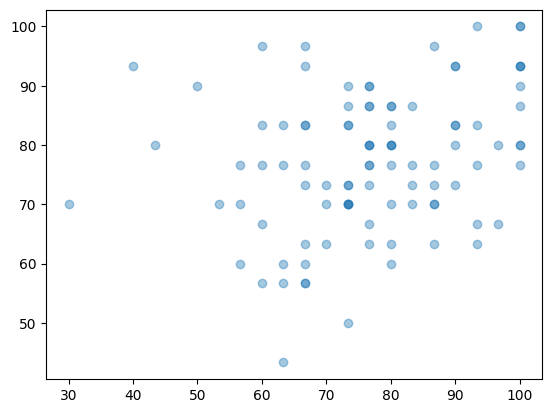

In [7]:
plt.scatter(fof_total,mot_total,alpha = 0.4)
plt.show

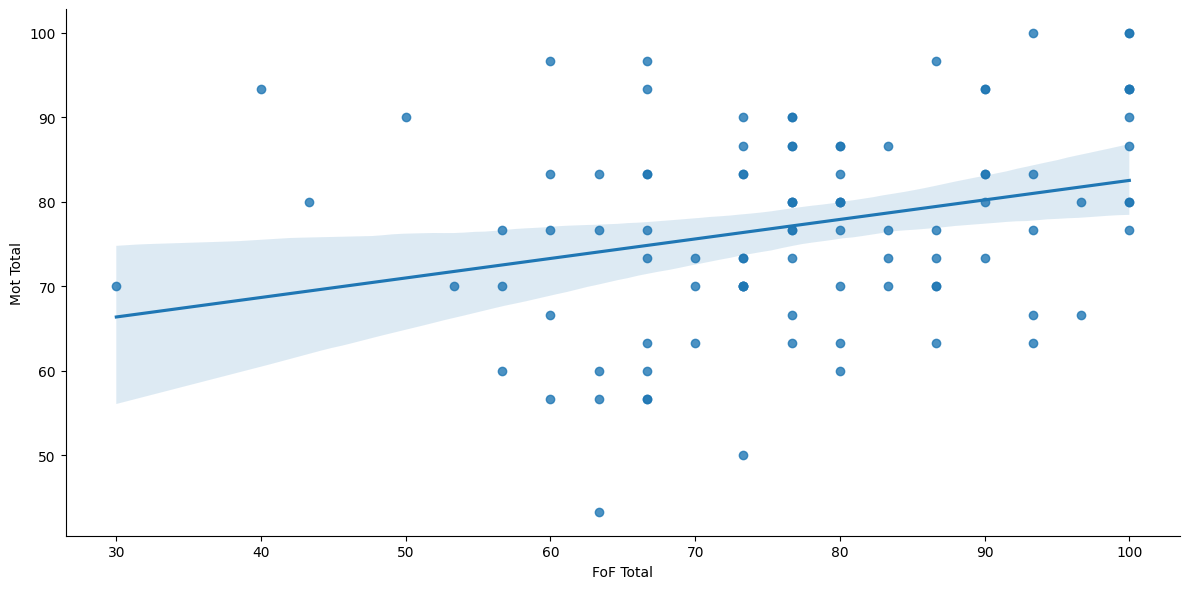

In [8]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2);

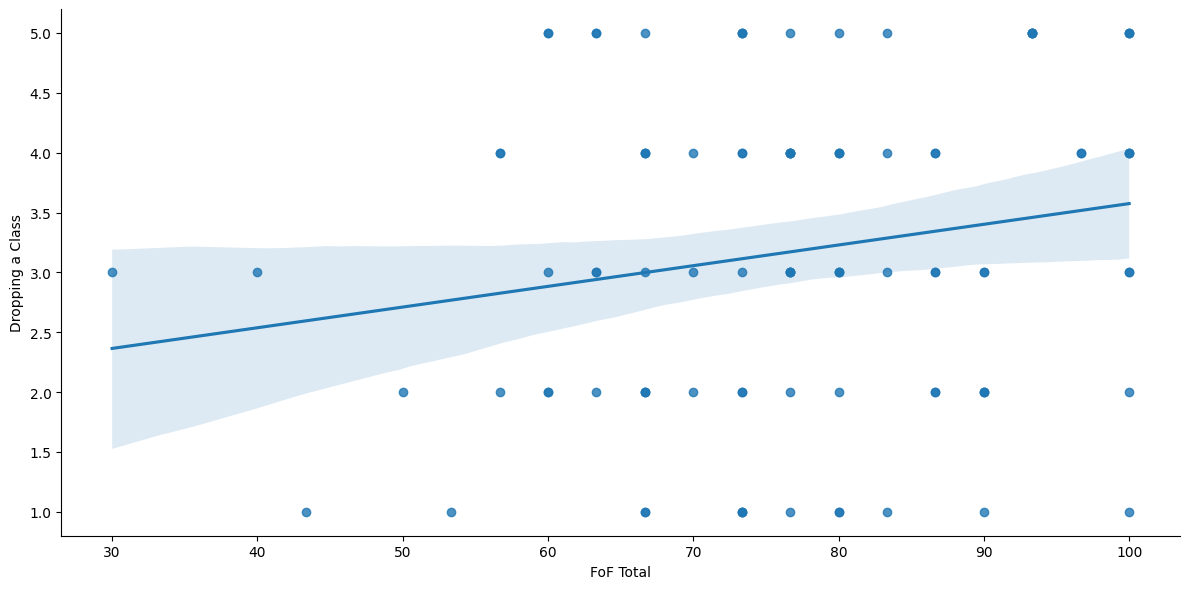

In [9]:
sns.lmplot(x='FoF Total', y='Dropping a Class', data=df, fit_reg=True, height=6, aspect=2);

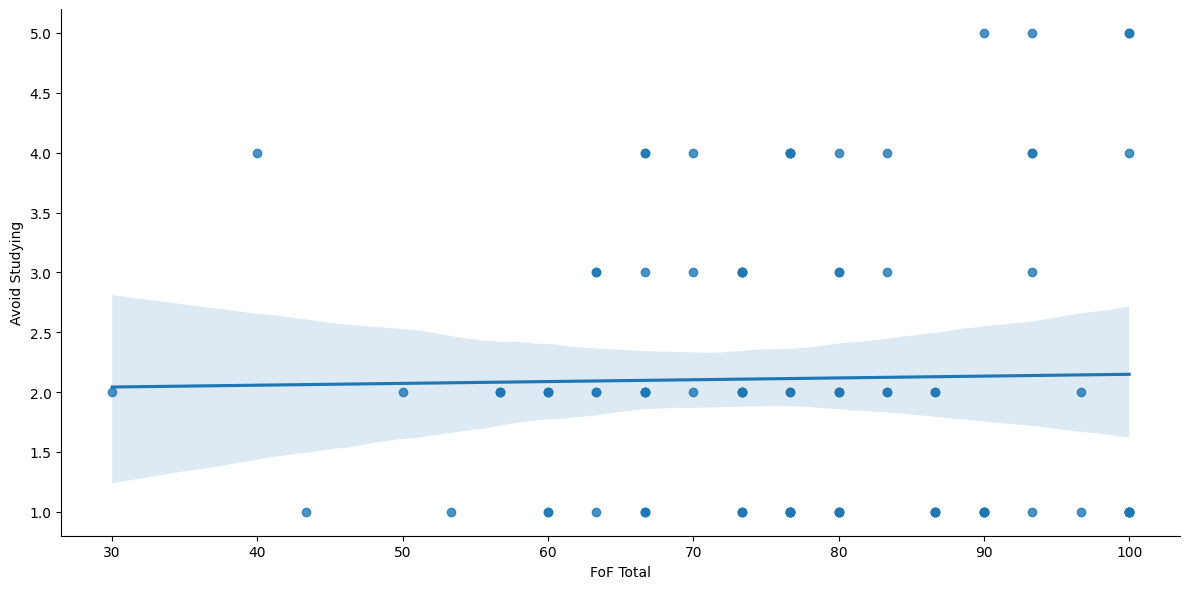

In [10]:
sns.lmplot(x='FoF Total', y='Avoid Studying', data=df, fit_reg=True, height=6, aspect=2);

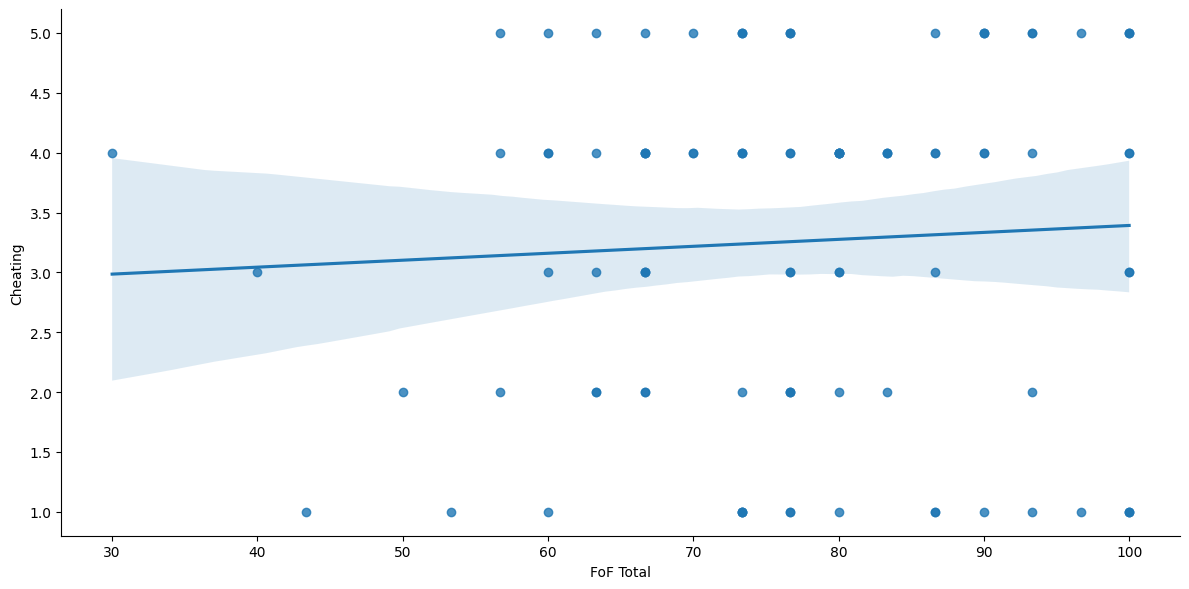

In [11]:
sns.lmplot(x='FoF Total', y='Cheating', data=df, fit_reg=True, height=6, aspect=2);

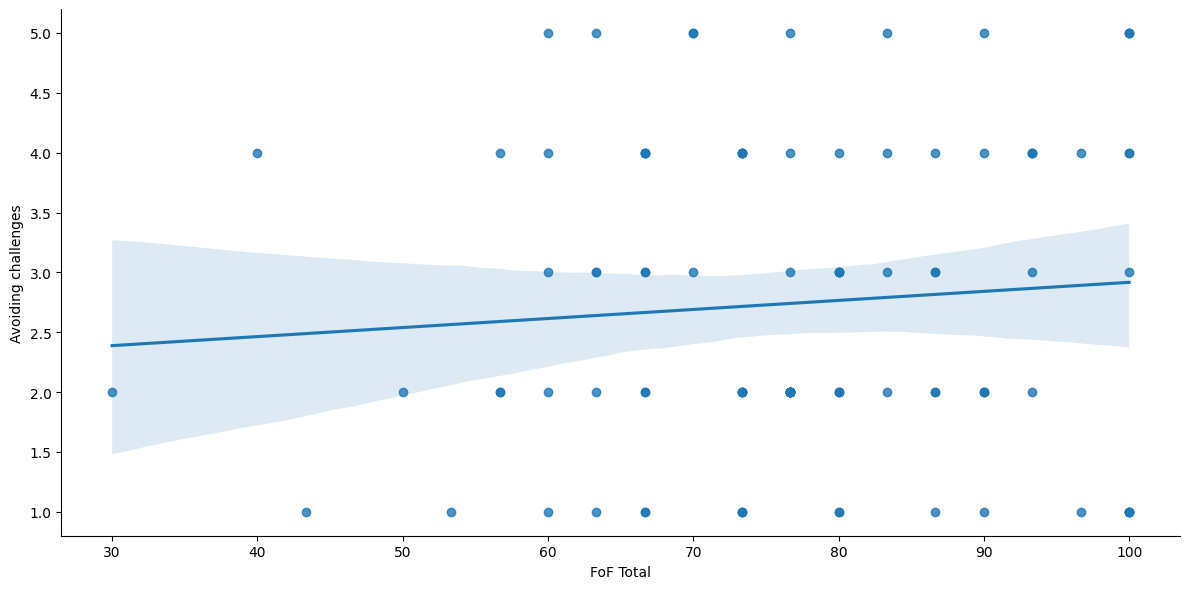

In [12]:
sns.lmplot(x='FoF Total', y='Avoiding challenges', data=df, fit_reg=True, height=6, aspect=2);

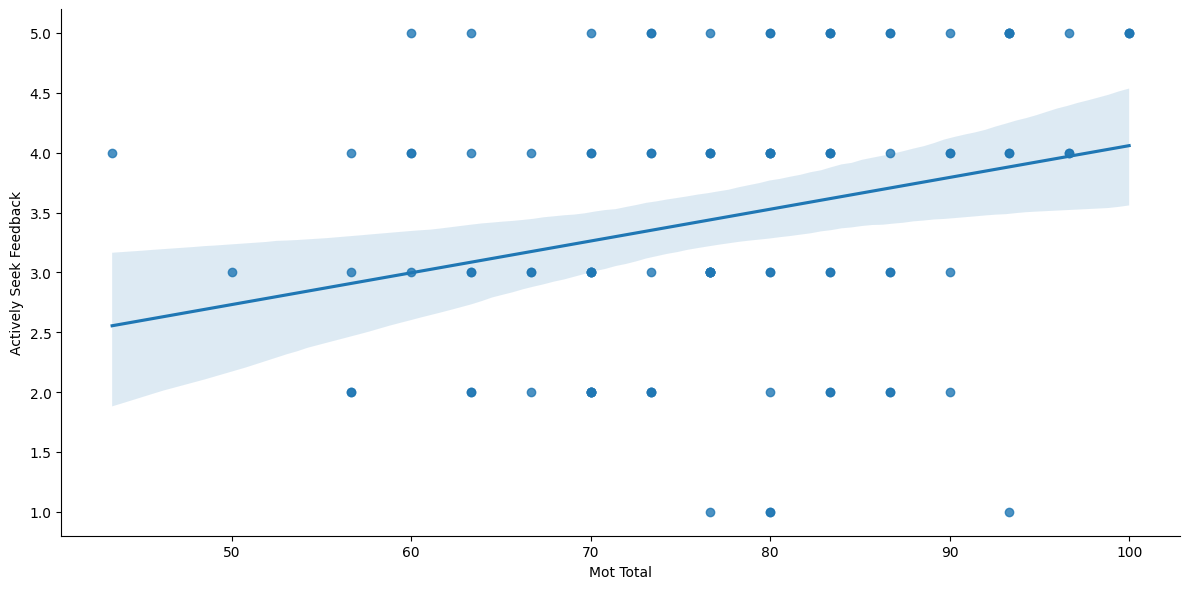

In [13]:
sns.lmplot(x='Mot Total', y='Actively Seek Feedback', data=df, fit_reg=True, height=6, aspect=2);

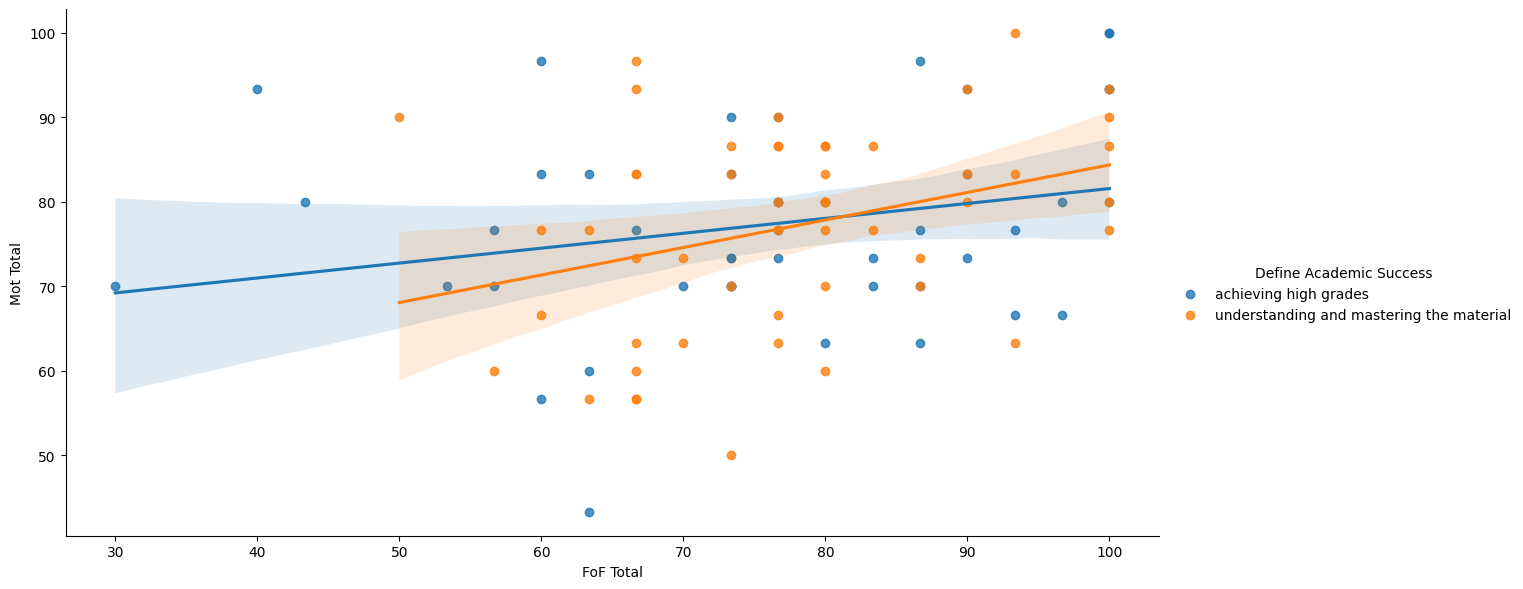

In [14]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2, hue = "Define Academic Success");

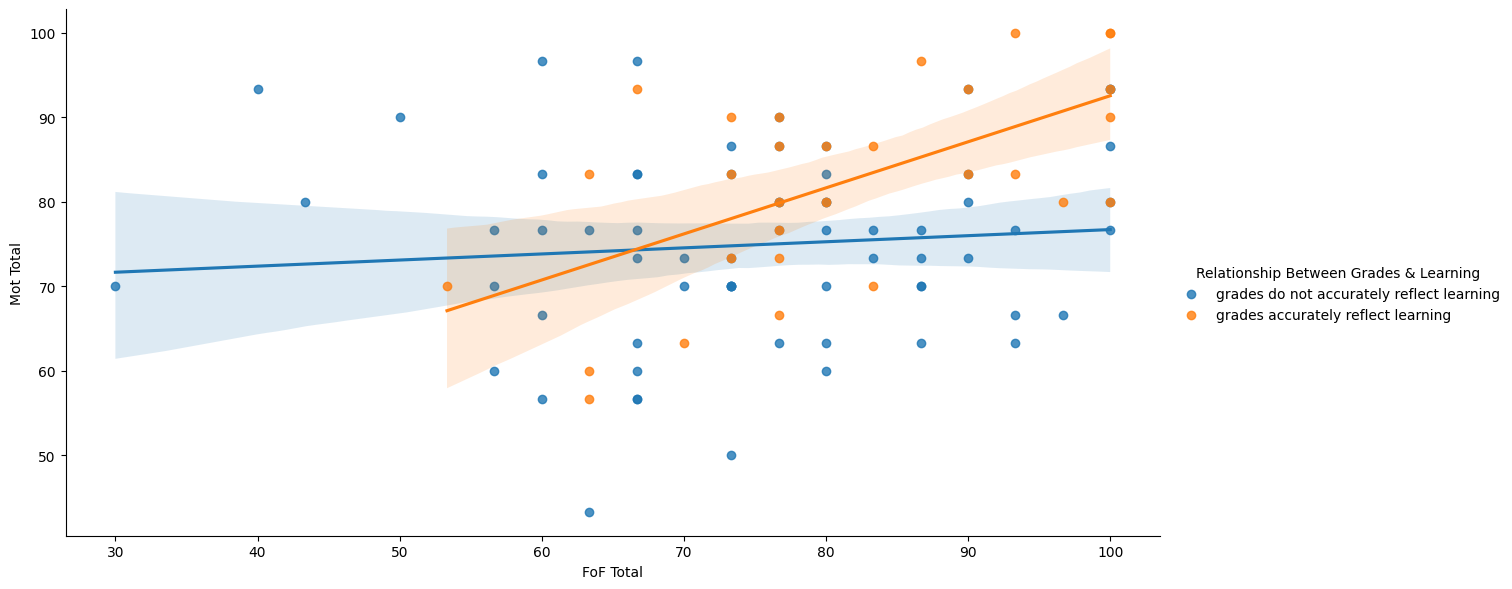

In [15]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2, hue = "Relationship Between Grades & Learning");

In [16]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.28217833113117535
p_value: 0.005106283463202549


In [17]:
model = sm.OLS(df['Mot Total'], df['FoF Total'])
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Mot Total   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              2260.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                    1.59e-68
Time:                        17:05:31   Log-Likelihood:                         -405.16
No. Observations:                  97   AIC:                                      812.3
Df Residuals:                      96   BIC:                                      814.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------